In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

588

In [3]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('+++++++++++++++++++++++++++++')

# raw_cities = ['Seattle', 'Los Angeles', 'Chicago', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('+++++++++++++++++++++++++++++')
print('Data Retrieval Complete')
print('+++++++++++++++++++++++++++++')

Beginning Data Retrieval
+++++++++++++++++++++++++++++
processing Record 1 of Set 1 | urumqi
processing Record 2 of Set 1 | steamboat springs
processing Record 3 of Set 1 | chuy
processing Record 4 of Set 1 | alofi
processing Record 5 of Set 1 | port hedland
processing Record 6 of Set 1 | komsomolskiy
processing Record 7 of Set 1 | waipawa
processing Record 8 of Set 1 | bubaque
processing Record 9 of Set 1 | jamestown
processing Record 10 of Set 1 | rocha
processing Record 11 of Set 1 | pochutla
processing Record 12 of Set 1 | palu
processing Record 13 of Set 1 | shingu
processing Record 14 of Set 1 | dunedin
processing Record 15 of Set 1 | yerbogachen
processing Record 16 of Set 1 | busselton
processing Record 17 of Set 1 | half moon bay
processing Record 18 of Set 1 | kaitangata
processing Record 19 of Set 1 | illoqqortoormiut
City illoqqortoormiut not found. Skipping...
processing Record 20 of Set 1 | carnarvon
processing Record 21 of Set 1 | port hardy
processing Record 22 of Set 1

City barentsburg not found. Skipping...
processing Record 40 of Set 4 | fortuna
processing Record 41 of Set 4 | maarianhamina
processing Record 42 of Set 4 | ancud
processing Record 43 of Set 4 | bababe
City bababe not found. Skipping...
processing Record 44 of Set 4 | nizhneyansk
City nizhneyansk not found. Skipping...
processing Record 45 of Set 4 | kribi
processing Record 46 of Set 4 | touros
processing Record 47 of Set 4 | eureka
processing Record 48 of Set 4 | miranorte
City miranorte not found. Skipping...
processing Record 49 of Set 4 | kuusamo
processing Record 50 of Set 4 | zhigansk
processing Record 1 of Set 5 | port elizabeth
processing Record 2 of Set 5 | udachnyy
processing Record 3 of Set 5 | puerto narino
processing Record 4 of Set 5 | erenhot
processing Record 5 of Set 5 | goderich
processing Record 6 of Set 5 | east london
processing Record 7 of Set 5 | cowra
processing Record 8 of Set 5 | belushya guba
City belushya guba not found. Skipping...
processing Record 9 of S

processing Record 25 of Set 8 | hambantota
processing Record 26 of Set 8 | huilong
processing Record 27 of Set 8 | okha
processing Record 28 of Set 8 | poronaysk
processing Record 29 of Set 8 | hamilton
processing Record 30 of Set 8 | doha
processing Record 31 of Set 8 | mahenge
processing Record 32 of Set 8 | pitea
processing Record 33 of Set 8 | kailua
processing Record 34 of Set 8 | mount gambier
processing Record 35 of Set 8 | brumado
processing Record 36 of Set 8 | bengkulu
processing Record 37 of Set 8 | naze
processing Record 38 of Set 8 | at-bashi
processing Record 39 of Set 8 | cayenne
processing Record 40 of Set 8 | anloga
processing Record 41 of Set 8 | lorengau
processing Record 42 of Set 8 | saint george
processing Record 43 of Set 8 | bajo baudo
City bajo baudo not found. Skipping...
processing Record 44 of Set 8 | klaksvik
processing Record 45 of Set 8 | saint-joseph
processing Record 46 of Set 8 | krasnousolskiy
City krasnousolskiy not found. Skipping...
processing Reco

City warqla not found. Skipping...
processing Record 9 of Set 12 | fukue
processing Record 10 of Set 12 | cururupu
processing Record 11 of Set 12 | tabou
processing Record 12 of Set 12 | krasnogvardeyskiy
processing Record 13 of Set 12 | barmer
processing Record 14 of Set 12 | faya
processing Record 15 of Set 12 | antofagasta
processing Record 16 of Set 12 | buchanan
processing Record 17 of Set 12 | watertown
processing Record 18 of Set 12 | matameye
City matameye not found. Skipping...
processing Record 19 of Set 12 | pangyan
processing Record 20 of Set 12 | safranbolu
processing Record 21 of Set 12 | mayumba
processing Record 22 of Set 12 | pandharpur
processing Record 23 of Set 12 | berlevag
processing Record 24 of Set 12 | baykit
processing Record 25 of Set 12 | san patricio
processing Record 26 of Set 12 | ushtobe
processing Record 27 of Set 12 | katangli
processing Record 28 of Set 12 | burnie
processing Record 29 of Set 12 | turinsk
processing Record 30 of Set 12 | ambodifototra

# Insert Raw Data in Dataframe

In [4]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [47]:
#  Display the DataFrame

cityWeatherDF
Sorted_DF = cityWeatherDF.sort_values(by='City')
pd.set_option('display.max_rows', None)
print(Sorted_DF)

                           City      Lat       Lng  Max Temp  Humidity  \
312                      Abohar  30.1500   74.1833     54.37        40   
507                  Abu Samrah  35.3029   37.1841     48.58        66   
135                      Agadez  19.7500   10.2500     62.13        21   
103                       Airai  -8.9266  125.4092     60.22        92   
464                    Ajdabiya  30.7554   20.2263     61.25        66   
195                        Aksu  41.1231   80.2644     23.36        40   
399                   Alakurtti  66.9672   30.3491     22.84        95   
431                     Alamosa  37.4695 -105.8700     28.38        69   
39                       Albany  42.6001  -73.9662     55.94        83   
198               Alice Springs -23.7000  133.8833     78.35        61   
425                   Alirajpur  22.3031   74.3546     65.37        41   
3                         Alofi -19.0595 -169.9187     76.89        94   
218               Alta Floresta  -9.87

In [48]:
# Validate the record counts and all the columns have the same number of records.

cityWeatherDF.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [49]:
# There are more than 500 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          545
Lat           544
Lng           545
Max Temp      525
Humidity       87
Cloudiness     94
Wind Speed    336
Country       118
Date          364
dtype: int64

In [50]:
# Export Data into .csv file
cityWeatherDF.to_csv("../Output/city_weather.csv", index=False)

# Inspect the data and remove the cities where the humidity > 100%.

In [51]:
#Skip if no cities with humidity of 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,21.230277,20.854794,50.627431,73.266055,59.377982,8.028899,1.672507e+09
std,32.730764,89.691450,31.962095,21.062164,38.609426,5.878792,1.210501e+02
min,-54.800000,-179.166700,-47.510000,6.000000,0.000000,0.000000,1.672507e+09
25%,-3.800400,-53.461600,32.000000,62.000000,20.000000,3.440000,1.672507e+09
50%,25.519800,26.438400,60.400000,78.000000,75.000000,6.850000,1.672507e+09
75%,47.804300,96.370000,75.670000,89.000000,99.000000,10.890000,1.672507e+09
max,78.218600,179.316700,99.810000,100.000000,100.000000,38.160000,1.672507e+09


## Focusing on humidity values, we find that 20 cities have 100% humidity.

In [52]:
#  Get the indices of cities that have humidity over 100%.
# cityWeatherDF.loc[cityWeatherDF['Humidity'] > 99]
cityWeatherDF.loc[cityWeatherDF['City'] == 'Colombia']


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.Head(50)

AttributeError: 'DataFrame' object has no attribute 'Head'

# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# 
Latitude vs. Temperature Plot

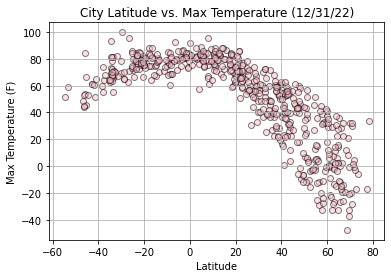

In [54]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

In [55]:
# Latitude vs. Humidity Plot


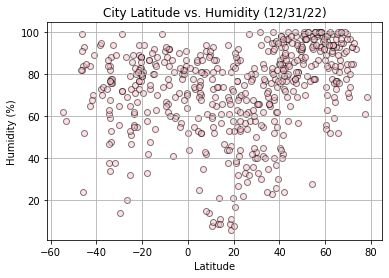

In [56]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Humidity.png")
plt.show()

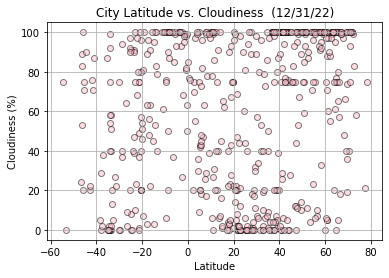

In [57]:
# Latitude vs. Cloudiness Plot

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

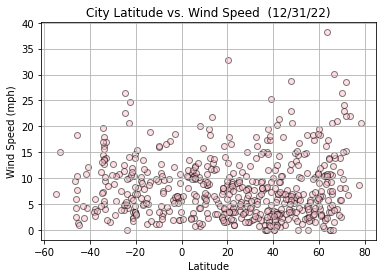

In [58]:
# Latitude vs. Wind Speed

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

In [59]:
# Linear Regression


def plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(x_values,y_values, color='pink', alpha=0.5, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coords,fontsize=13,color="black")
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(plot_location)
    plt.show()


In [60]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ürümqi,43.8010,87.6005,4.15,85,75,2.24,CN,1672506985
1,Steamboat Springs,40.4850,-106.8317,38.93,93,100,3.00,US,1672506986
5,Yangi Marg`ilon,40.4272,71.7189,36.32,87,100,0.00,UZ,1672506988
7,Bubaque,11.2833,-15.8333,82.81,52,86,8.66,GW,1672506990
8,Jamestown,42.0970,-79.2353,53.19,73,100,6.91,US,1672506990


In [61]:
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Chui,-33.6971,-53.4616,81.09,48,0,17.87,UY,1672506987
3,Alofi,-19.0595,-169.9187,76.89,94,100,8.05,NU,1672506987
4,Port Hedland,-20.3167,118.5667,80.65,83,96,6.91,AU,1672506988
6,Waipawa,-41.4122,175.5153,51.73,70,71,4.32,NZ,1672506989
9,Rocha,-34.4833,-54.3333,81.32,38,0,14.38,UY,1672506773


In [62]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

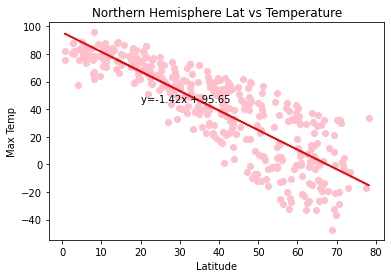

In [63]:
plt.scatter(northernHemisphereDF["Lat"], northernHemisphereDF["Max Temp"], color='pink')
x_axis = northernHemisphereDF["Lat"]
y_axis = northernHemisphereDF["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

The r-squared is: 0.7278642342795817


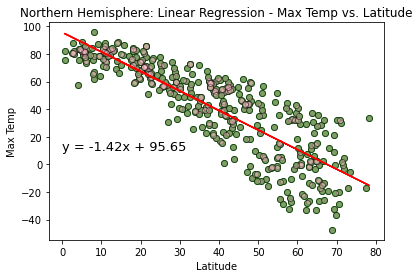

In [64]:
# Add the linear regression equation and line to plot
plt.scatter(northernHemisphereDF['Lat'],northernHemisphereDF['Max Temp'], color='green')
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']


plot_title = "Northern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (0,10)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.35906898415113303


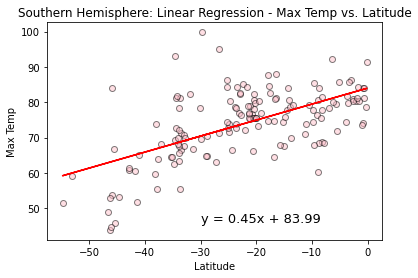

In [65]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

plot_title = "Southern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (-30,46)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.21766370600103227


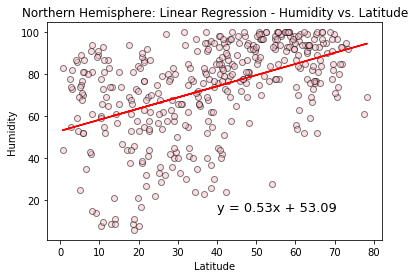

In [66]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

plot_title = "Northern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.008419658951218328


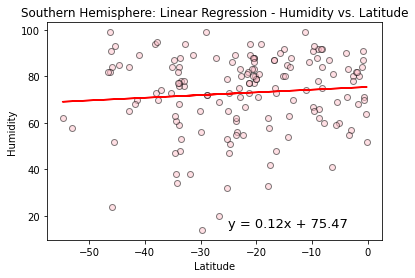

In [67]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

plot_title = "Southern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (-25,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.09643310246358805


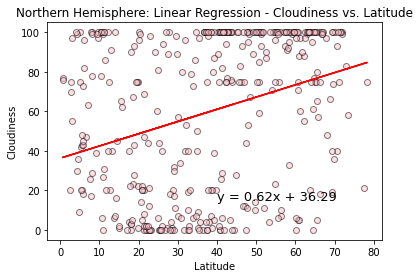

In [68]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

plot_title = "Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.171222585523438


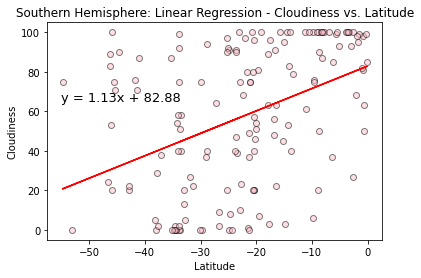

In [69]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

plot_title = "Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (-55,65)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.013033596182287933


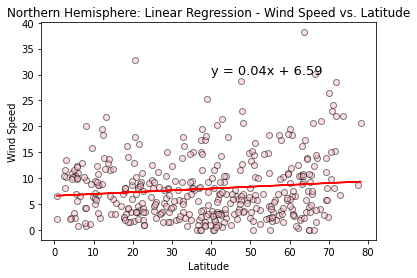

In [70]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

plot_title = "Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (40,30)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.007280607027361518


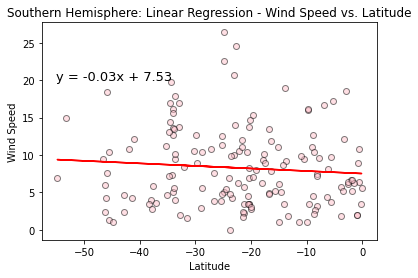

In [71]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

plot_title = "Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (-55,20)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)